In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
gold_dataset_addr = "./data/Gold Price.csv"
gold_dataset = pd.read_csv(gold_dataset_addr)
gold_dataset.head(10)

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95
5,2024-12-30,75517,75443,76450,75336,10260,-0.35
6,2024-12-27,75783,76160,76445,75661,15260,-0.43
7,2024-12-26,76114,75868,76200,75760,9730,0.73
8,2024-12-24,75562,75625,75688,75424,10820,0.07
9,2024-12-23,75506,75680,75964,75352,14200,-0.37


In [3]:
gold_dataset.info()
gold_dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2848 non-null   object 
 1   Price   2848 non-null   int64  
 2   Open    2848 non-null   int64  
 3   High    2848 non-null   int64  
 4   Low     2848 non-null   int64  
 5   Volume  2848 non-null   int64  
 6   Chg%    2848 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 155.9+ KB


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

### Data preparation steps

- Convert 'Date' to datetime
- Convert 'Price' from Indian Rupees to US Dollars
- Check null values

In [4]:
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])
gold_dataset.set_index('Date', inplace=True)

In [5]:
conversion_rate = 85.96
price_columns = ['Price', 'Open', 'High', 'Low']

for col in price_columns:
    gold_dataset[col] =round(gold_dataset[col].astype(float) / conversion_rate, 2)


In [6]:
gold_dataset.dtypes

Price     float64
Open      float64
High      float64
Low       float64
Volume      int64
Chg%      float64
dtype: object

In [7]:
gold_dataset.isnull().sum()

Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [20]:
gold_dataset.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95


### Exploratory Data Analysis (EDA)

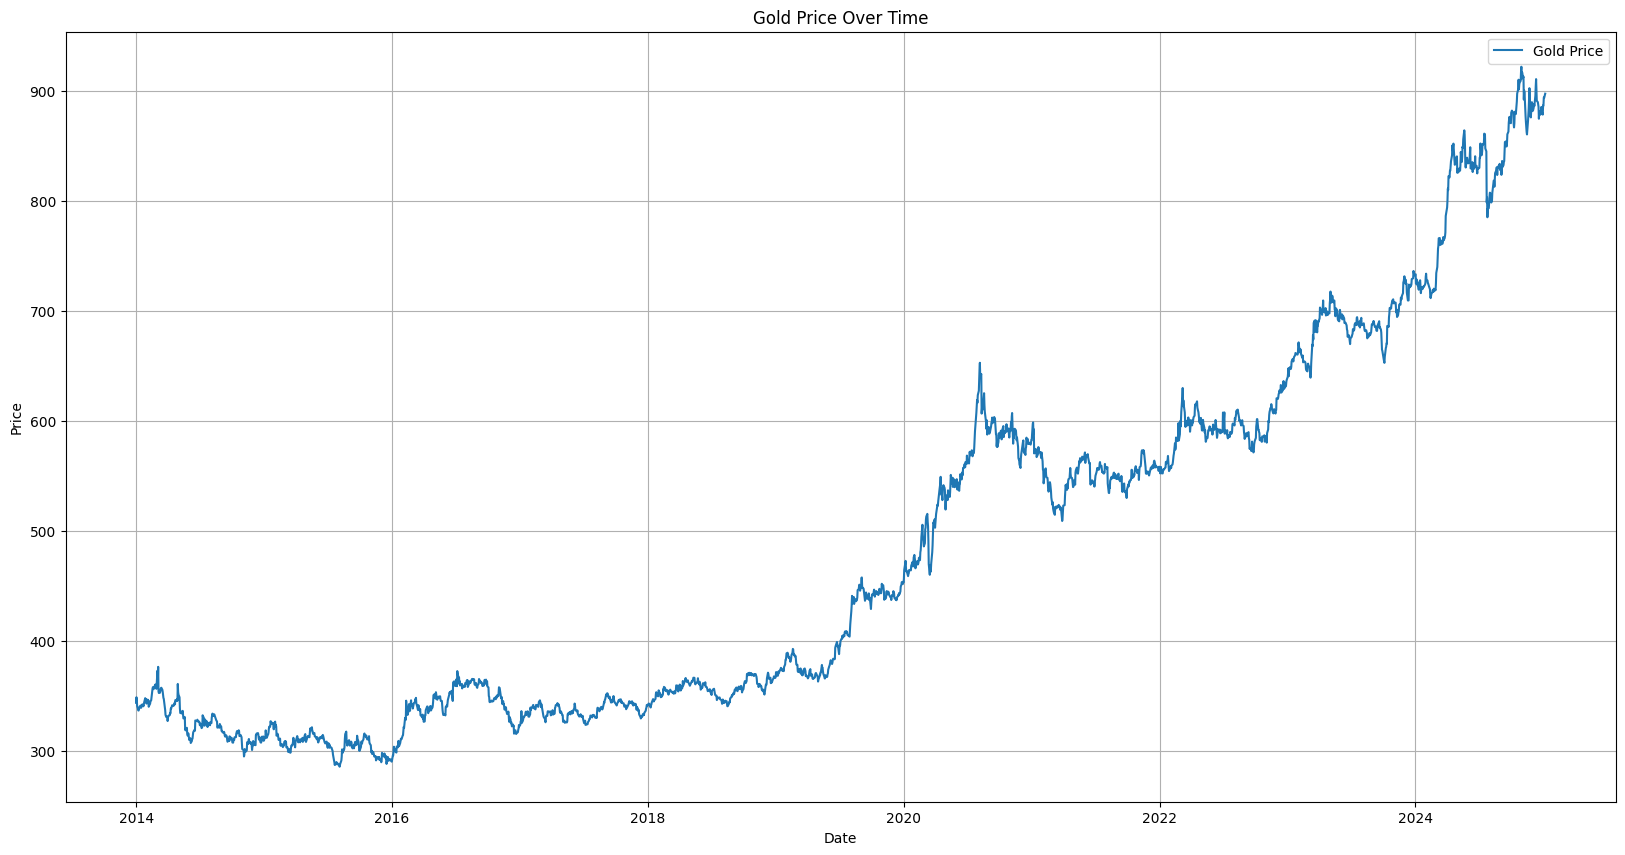

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(gold_dataset['Price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Now we verify if there are any anomalies in the dataset. To do so we calculate the mean and standard deviation of the 'Price' column. We then flag data points that are more than 3 standard deviations away from the mean.

In [14]:
mean = gold_dataset['Price'].mean()
std = gold_dataset['Price'].std()

print(f"Mean: {mean}, Standard Deviation: {std}")

Mean: 479.54614466292134, Standard Deviation: 167.2231304553272


In [15]:
anomalies = gold_dataset[(gold_dataset['Price'] > mean + 3*std) | (gold_dataset['Price'] < mean - 3*std)]

print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 0


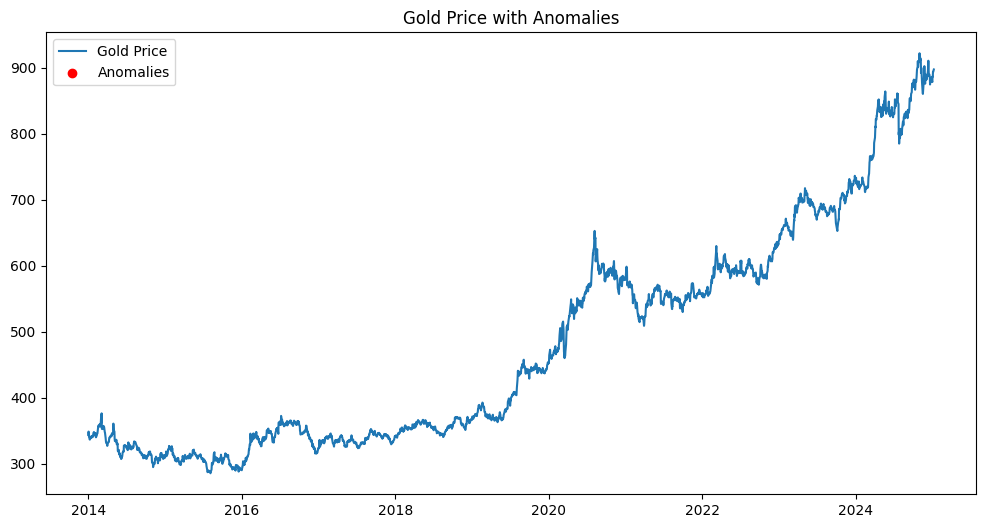

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(gold_dataset['Price'], label='Gold Price')
plt.scatter(anomalies.index, anomalies['Price'], color='red', label='Anomalies')
plt.title('Gold Price with Anomalies')
plt.legend()
plt.show()


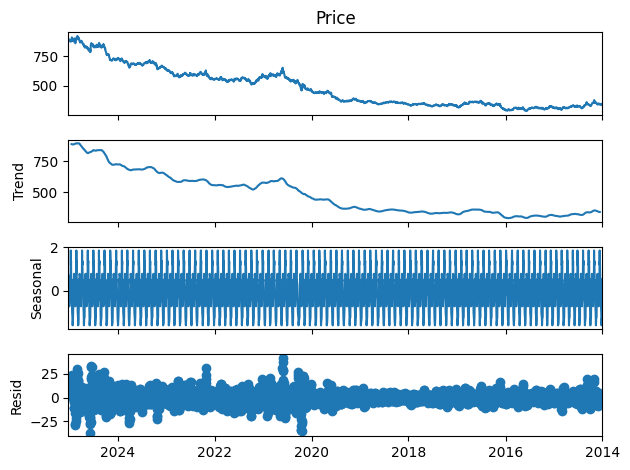

In [10]:
result = seasonal_decompose(gold_dataset['Price'], model='additive', period=30)  # or model='multiplicative'
result.plot()
plt.show()
